### LSTM : Using TextVectorization in a Sentiment Analysis Model

In [2]:
# Load the CSV file, shuffle the rows randomly, and display the first rows
import pandas as pd

df = pd.read_csv('reviews.csv', encoding="ISO-8859-1")
df = df.sample(frac=1, random_state=0)
df.head()


,Text,Sentiment
11841,Al Pacino was once an actor capable of making ...,0
19602,After Chaplin made one of his best films: Doug...,0
45519,This movie is sort of a Carrie meets Heavy Met...,1
25747,I have fond memories of watching this visually...,1
42642,"In the '70s, Charlton Heston starred in sci-fi...",1


In [3]:
# Group the data by sentiment and display descriptive statistics for each group
df.groupby('Sentiment').describe()


Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  You do realize that you've been watching the E...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

In [4]:
# Remove duplicate rows, then group the data by sentiment and display descriptive statistics for each group
df = df.drop_duplicates()
df.groupby('Sentiment').describe()


Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  What could've been a great film about the late...   
1          24884  24884  I really enjoyed this film. All aspects of the...   

                
          freq  
Sentiment       
0            1  
1            1

In [5]:
# Group the data by sentiment and display descriptive statistics for each group
df.groupby('Sentiment').describe()


Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  What could've been a great film about the late...   
1          24884  24884  I really enjoyed this film. All aspects of the...   

                
          freq  
Sentiment       
0            1  
1            1

In [6]:
# Define model parameters and import necessary TensorFlow/Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Dense,LSTM, Embedding, InputLayer
import tensorflow as tf

# Maximum number of words to consider in the vocabulary
max_words = 20000

# Maximum length of sequences (padded)
max_length = 500


In [7]:
# Build a simple text classification model using Keras Sequential API
model = Sequential()

# Input layer: expects a single string per sample
model.add(InputLayer(shape=(1,), dtype=tf.string))

# Convert text to sequences of integers, with a fixed vocabulary size and sequence length
model.add(TextVectorization(max_tokens=max_words, output_sequence_length=max_length))

# Embedding layer: maps integer sequences to dense vectors of size 32
model.add(Embedding(max_words, 32))

# Flatten the 2D embeddings into a 1D vector for the Dense layers
model.add(LSTM(32))
# Output layer for binary classification with sigmoid activation
model.add(Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display a summary of the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 500)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 500, 32)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,353 (2.47 MB)

 Trainable params: 648,353 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Prepare input and target data, and adapt the TextVectorization layer to the dataset
x = df['Text'].astype(str).values  # Convert text column to string array
y = df['Sentiment'].values         # Get sentiment labels as a NumPy array

# Adapt the TextVectorization layer to learn the vocabulary from the text data
model.layers[0].adapt(x)


In [9]:
hist = model.fit(x, y, validation_split=0.5, epochs=5, batch_size=250)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.5029 - loss: 0.6931 - val_accuracy: 0.5049 - val_loss: 0.6933
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5088 - loss: 0.6925 - val_accuracy: 0.5055 - val_loss: 0.6927
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.5198 - loss: 0.6871 - val_accuracy: 0.5051 - val_loss: 0.6972
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.5347 - loss: 0.6715 - val_accuracy: 0.5041 - val_loss: 0.7021
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.5411 - loss: 0.6564 - val_accuracy: 0.5033 - val_loss: 0.7196


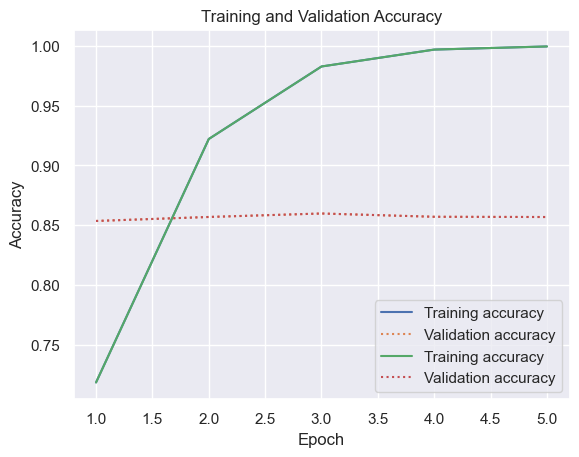

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [24]:
# Predict the sentiment of a single text sample
text = 'Excellent food and fantastic service!'

# The model expects a batch of inputs, so we wrap the text in a list and convert to a tf.constant
prediction = model.predict(tf.constant([text]))[0][0]

prediction  # Output the predicted probability (close to 1 → positive, close to 0 → negative)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


np.float32(0.9972028)

In [25]:
text = 'The long lines and poor customer service really turned me off.'
model.predict(tf.constant([text]))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


np.float32(0.43204093)

In [27]:
model.export('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.string, name='keras_tensor_2')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1829503920912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1829040012752: TensorSpec(shape=(), dtype=tf.int64, name=None)
  1828821675344: TensorSpec(shape=(), dtype=tf.string, name=None)
  1828821674960: TensorSpec(shape=(), dtype=tf.int64, name=None)
  1828821677072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828821677648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828821678608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828821679760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828821679376: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [31]:
import tensorflow as tf
from keras.layers import TFSMLayer

# Load the exported model
layer = TFSMLayer("saved_model", call_endpoint='serve')

# Input texts as a 2D tensor
texts = ["I love this movie!", "This was terrible."]
texts_tensor = tf.constant(texts, shape=(len(texts), 1))  # shape = (2, 1)

# Make predictions
predictions = layer(texts_tensor)
print(predictions.numpy())


[[0.94276446]
 [0.44492367]]
